# Laboratorio de regresión - 2

|                |   |
:----------------|---|
| **Nombre**     | Eddie Aguilar  |
| **Fecha**      | 27/01/2025  |
| **Expediente** | 739352  |

## Regresión polinomial

Observa la siguiente gráfica.

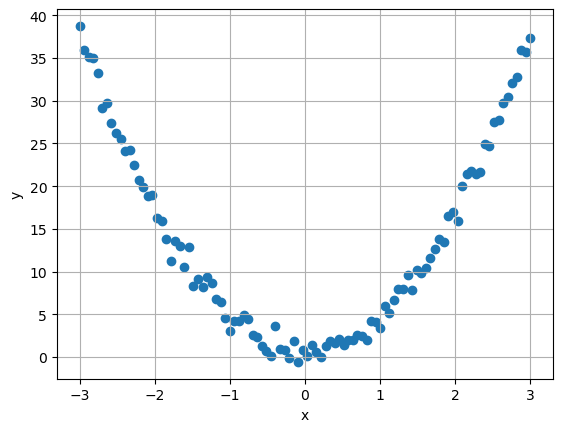

In [124]:
import matplotlib.pyplot as plt; import numpy as np
%matplotlib inline
np.random.seed(0)
x = np.linspace(-3, 3, 100); y = 1 + 4*x**2 + np.random.normal(0, 1, 100)
plt.figure(); plt.xlabel("x"); plt.ylabel("y")
plt.scatter(x, y); plt.grid()

Utiliza `sklearn` para realizar una regresión lineal simple ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x $)

In [125]:
from sklearn.linear_model import LinearRegression
import numpy as np

model = LinearRegression()

X = x.reshape([-1, 1])
y = y.reshape([-1, 1])

model.fit(X, y)

X_calc = np.hstack((np.ones(X.shape), X))
betas_calc = np.linalg.inv(X_calc.T @ X_calc) @ X_calc.T @ y

betas_calc = [betas_calc[0, 0], betas_calc[1, 0]]
betas = [model.intercept_[0], model.coef_[0][0]]

print("Computed betas: {}".format(betas))
print("Calculated betas: {}".format(betas_calc))

Computed betas: [13.30223225795873, -0.049554477435906644]
Calculated betas: [13.302232257958728, -0.049554477435907074]


Crea una gráfica donde se muestren las observaciones como una nube de puntos y la línea que ajustaste con regresión. Calcula el métrico $R^2$.

Computed R2: 5.80345273922811e-05
Calculated R2: 5.8034527392232364e-05


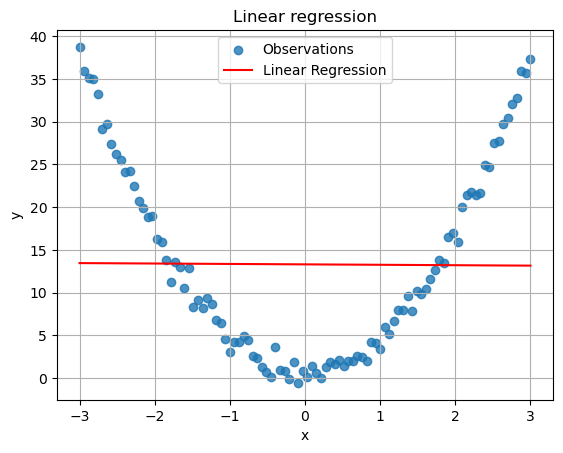

In [126]:
ypred = model.predict(X)

plt.title("Linear regression")
plt.scatter(x, y, alpha=0.8, label="Observations")
plt.plot(x, ypred, color="red", label="Linear Regression")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

print("Computed R2: {}".format(model.score(X, y)))

tss = np.sum((y - np.average(y))**2)
rss = np.sum((y - ypred)**2)

r2 = (tss - rss)/tss

print("Calculated R2: {}".format(r2))

Podemos ver que el ajuste no es correcto, pues parece que tiene un comportamiento cuadrático y estamos intentando ajustar una línea recta.

En lugar de hacer una regresión lineal simple, quizás podamos extender el modelo para que tenga varios factores dentro:

$$ Y = \beta_0 + \beta_1 X + \beta_2 X^2 + ... + \beta_p X^p + \epsilon$$

Ajusta un modelo cuadrático con `sklearn` ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x + \hat{\beta_1}x^2 $) y calcula su $R^2$.

In [127]:
model = LinearRegression()

X = np.hstack((X, X**2))

model.fit(X, y)

r2 = model.score(X, y)

print("R2 con modelo cuadrático: {}".format(r2))

R2 con modelo cuadrático: 0.9934118040713642


Crea una gráfica con las observaciones y la nueva curva que ajustaste.

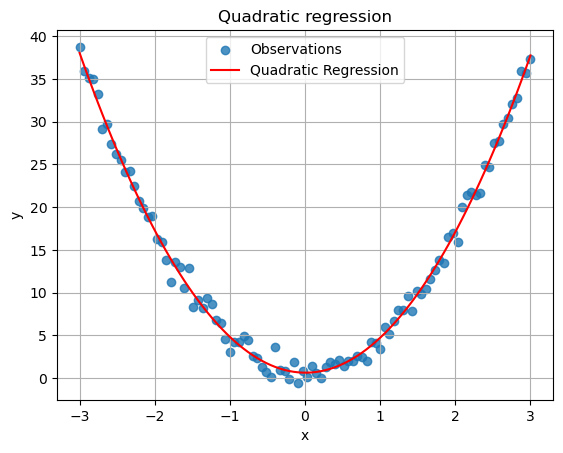

In [128]:
ypred = model.predict(X)

plt.title("Quadratic regression")
plt.scatter(x, y, alpha=0.8, label="Observations")
plt.plot(x, ypred, color="red", label="Quadratic Regression")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

Ajusta modelos de grados 3, 5, 7, 9, y 11. Calcula su $R^2$.

In [129]:
# Regression funtcion
def regression(x, y, degree):
    model = LinearRegression()
    x = x.reshape(-1, 1)
    X = x # X is our matrix: [n, p] where p is our features
    if degree > 1:
        for i in range(2, degree+1):
            X = np.hstack((X, x**i)) # For polynomial regression, our features are x powered by degree
    y = y.reshape(-1, 1)
    model.fit(X, y) # Fit the model with our features
    r2 = model.score(X, y) # Get the r2
    return r2


In [130]:
for i in range(3, 12, 2):
    print("Polynomial regresssion of degree {} has a r2 score of {}".format(i, regression(x, y, i)))

Polynomial regresssion of degree 3 has a r2 score of 0.9934129585186598
Polynomial regresssion of degree 5 has a r2 score of 0.9934954953676421
Polynomial regresssion of degree 7 has a r2 score of 0.9935089341876935
Polynomial regresssion of degree 9 has a r2 score of 0.9935141799662259
Polynomial regresssion of degree 11 has a r2 score of 0.9935338704150221


Crea una gráfica por cada modelo con las observaciones y su curva.

In [131]:
# Updating regression funtcion
def regression(x, y, degree):
    model = LinearRegression()
    x = x.reshape(-1, 1)
    X = x # X is our matrix: [n, p] where p is our features
    if degree > 1:
        for i in range(2, degree+1):
            X = np.hstack((X, x**i)) # For polynomial regression, our features are x powered by degree
    y = y.reshape(-1, 1)
    model.fit(X, y) # Fit the model with our features
    r2 = model.score(X, y) # Get the r2
    ypred = model.predict(X)
    
    plt.title("Polynomial regression of degree {}".format(degree))
    plt.scatter(x, y, alpha=0.8, label="Observations")
    plt.plot(x, ypred, color="red", label="Regression")
    plt.grid()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()
    
    return r2

    

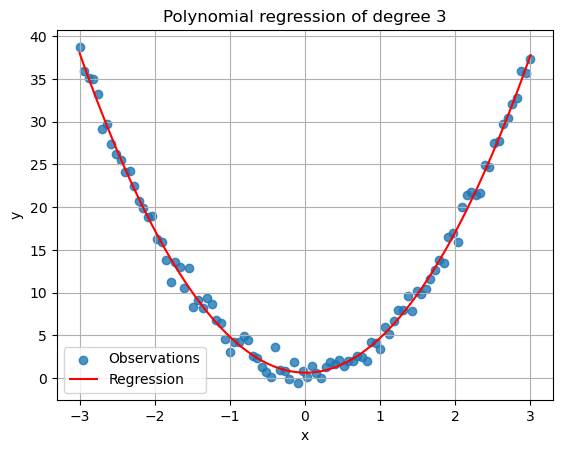

Polynomial regresssion of degree 3 has a r2 score of 0.9934129585186598


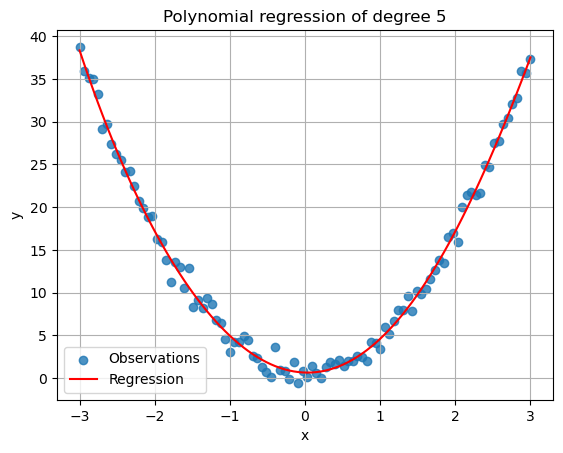

Polynomial regresssion of degree 5 has a r2 score of 0.9934954953676421


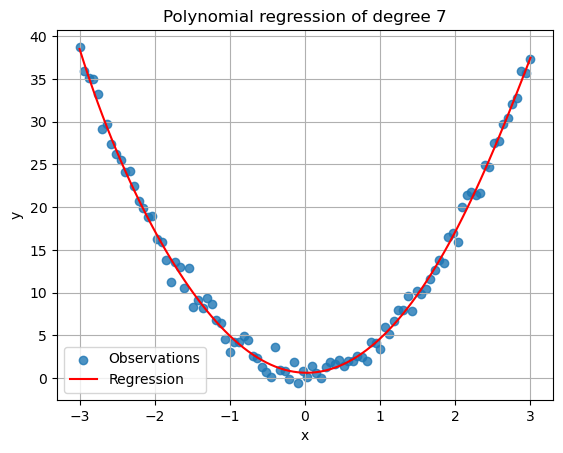

Polynomial regresssion of degree 7 has a r2 score of 0.9935089341876935


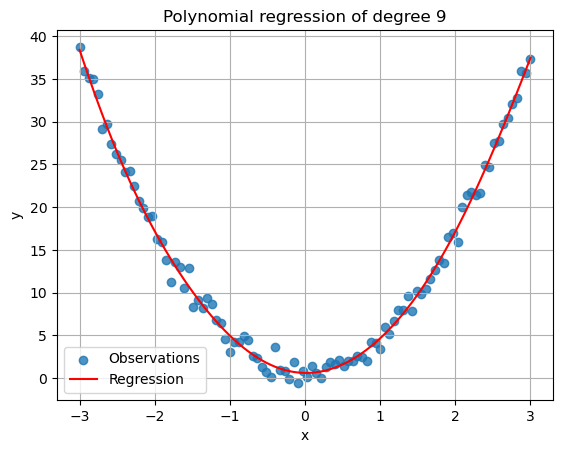

Polynomial regresssion of degree 9 has a r2 score of 0.9935141799662259


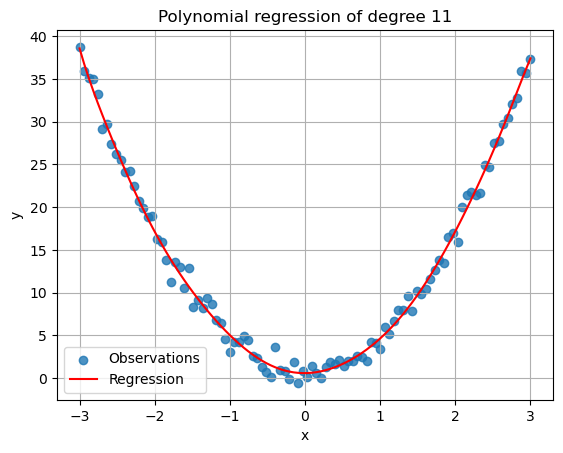

Polynomial regresssion of degree 11 has a r2 score of 0.9935338704150221


In [132]:
for i in range(3, 12, 2):
    print("Polynomial regresssion of degree {} has a r2 score of {}".format(i, regression(x, y, i)))

**¿Cuál modelo consideras que es mejor? ¿Por qué?**

En realidad, cuando se tienen un dataset muy pequeño, regresiones polinomiales no van a cambiar tanto su error cuadrático a medida que sube el grado de la regresión. Por lo tanto, en este caso, una regresión polinomial de grado 2 es más que suficiente como modelo, sin embargo viendo los errores, nos damos cuenta que entre más alto sea el grado mejor r2 tendremos. 

Por último, viendo las gráficas es difícil notar una diferencia entre las distintas regresiones.  

Recuerda que una de las metas de ajustar modelos es para poder interpolar y extrapolar. Los datos que tenemos mantienen $x \in [-3, 3]$. ¿Qué pasaría si quisiéramos saber el valor de $y$ cuando $x=5$?

Calcula la predicción $\hat{y}$ para todos los modelos creados (grados 2, 3, 5, 7, 9, y 11).

In [ ]:
space = x.shape[0]/(x.max()-x.min()) # Get how many observations there are between every integer value of x array
xpred = np.linspace(-3, 5, np.round(100 + 2*space, 0).astype(int)) # Get the new x array that goes all the way to 5


In [134]:
# Updating regression funtcion
def regression(x, y, degree, xpred):
    model = LinearRegression()
    x = x.reshape(-1, 1)
    xpred = xpred.reshape(-1, 1)
    X = x # X is our matrix: [n, p] where p is our features
    Xpred = xpred.reshape(-1, 1)
    if degree > 1:
        for i in range(2, degree+1):
            X = np.hstack((X, x**i)) # For polynomial regression, our features are x powered by degree
            Xpred = np.hstack((Xpred, xpred**i))
    y = y.reshape(-1, 1)
    model.fit(X, y) # Fit the model with our features
    r2 = model.score(X, y) # Get the r2
    ypred = model.predict(Xpred)
    
    plt.title("Polynomial regression of degree {}".format(degree))
    plt.scatter(x, y, alpha=0.8, label="Observations")
    plt.plot(xpred, ypred, color="red", label="Regression")
    plt.grid()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()
    
    return r2

    

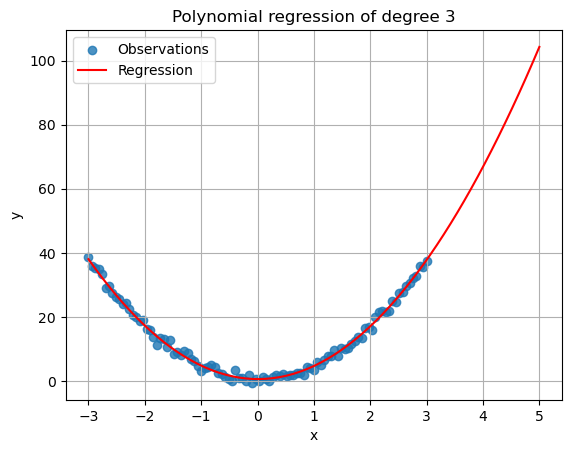

Polynomial regresssion of degree 3 has a r2 score of 0.9934129585186598


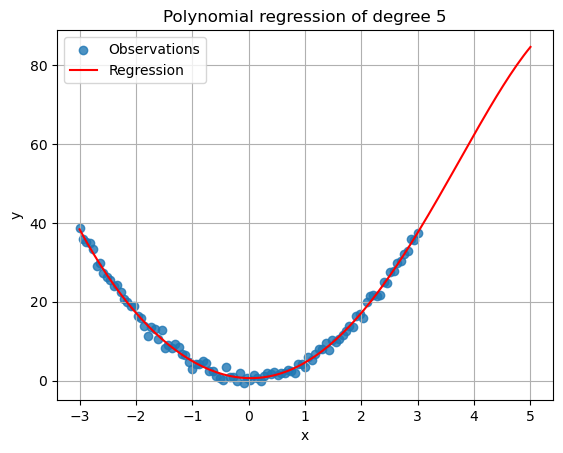

Polynomial regresssion of degree 5 has a r2 score of 0.9934954953676421


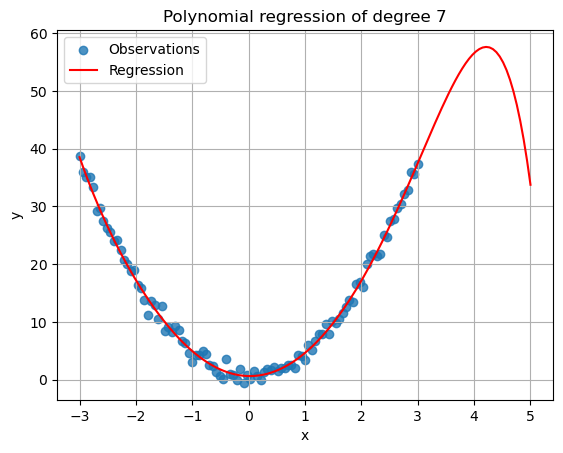

Polynomial regresssion of degree 7 has a r2 score of 0.9935089341876935


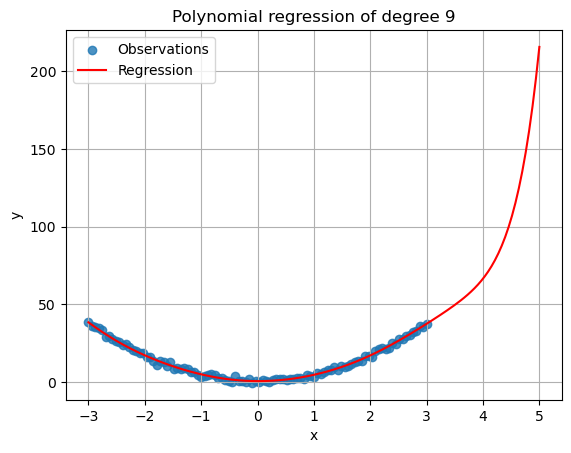

Polynomial regresssion of degree 9 has a r2 score of 0.9935141799662259


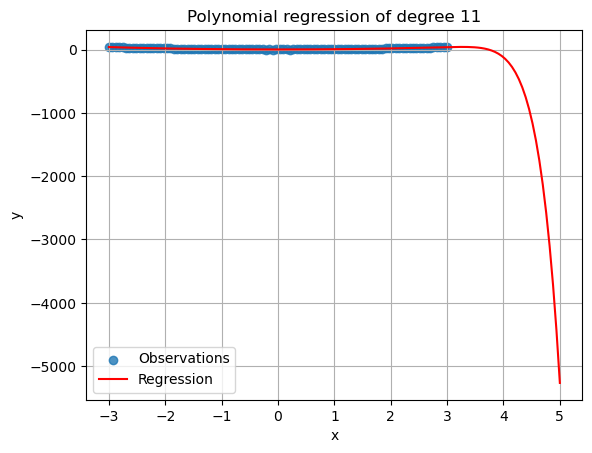

Polynomial regresssion of degree 11 has a r2 score of 0.9935338704150221


In [135]:
for i in range(3, 12, 2):
    print("Polynomial regresssion of degree {} has a r2 score of {}".format(i, regression(x, y, i, xpred)))

¿Cuál modelo crees que sea mejor?

Como podemos ver, a pesar de que regresiones polinomiales de grados más altos llegan a tener un error cuadrático más alto, nos damos cuenta que en realidad estos modelos fallan al extrapolar. 

Por lo tanto, el mejor modelo para una función cuadrática como la que tenemos aquí, es en realidad la regresión polinomial más simple de grado 2, o en el caso de las que tenemos presentes, grado 3. 


## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3